In [1]:
import numpy as np
import pandas as pd
from lxml import html
import requests
import datetime
import datedelta
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
def leave_list(lst, cond):
    to_append = []
    for i in range(len(lst)):
        if lst[i] > cond:
            to_append.append(lst[i])
    return to_append

In [3]:
titles = []
dates = []

In [4]:
now = (datetime.datetime.now())
to = (now - 3*datedelta.MONTH)
now = now.date()
to = to.date()

In [5]:
to

datetime.date(2017, 12, 19)

In [6]:
st = 'https://www.pravda.com.ua/search/page_'+str(1)+'/?search=%ED%E0%F2%EE'


In [7]:
curr_date = now
i = 1
while curr_date > to:
    page = requests.get('https://www.pravda.com.ua/search/page_' + str(i) + '/?search=%ED%E0%F2%EE')
    tree = html.fromstring(page.content)
    ptitles = tree.xpath('//div[@class="article__title"]/a/text()')[:30]
    pdates = tree.xpath('//div[@class="article article_search"]/div[@class="article__date"]/text()')[:30]
    pdates = [x[:10] for x in pdates]
    pdates = [datetime.datetime.strptime(date, '%d.%m.%Y').date() for date in pdates]
    titles.append(ptitles)
    dates.append(pdates)
    curr_date = pdates[29] 
    i += 1

In [8]:
dates = [item for sublist in dates for item in sublist]
titles = [item for sublist in titles for item in sublist]

In [9]:
dates = leave_list(dates, to)
ldates = len(dates)
titles = titles[:ldates]

In [10]:
fullDF = pd.DataFrame(
    {'title': titles,
     'date': dates,
    })

In [11]:
fullDF.head(5)

,date,title
0,2018-03-18,"Глава МЗС Британії: є докази, що РФ створила і..."
1,2018-03-18,РФ стає все більш непередбачуваною та агресивн...
2,2018-03-17,"Порошенко: членство в ЄС – питання років, а не..."
3,2018-03-17,РФ оголосила 23 британських дипломатів персона...
4,2018-03-17,Справа Скрипаля: Росія викликала до МЗС британ...


In [12]:
fullDF.to_csv('DF_with_names.csv', index=False)

In [13]:
fullDF.groupby('date').count().head(5)

,title
date,
2017-12-21,1
2017-12-22,1
2017-12-23,1
2017-12-24,1
2017-12-26,1


In [14]:
lightDF = fullDF.groupby('date').count()
lightDF.head(5)

,title
date,
2017-12-21,1
2017-12-22,1
2017-12-23,1
2017-12-24,1
2017-12-26,1


In [15]:
lightDF.to_csv('light_DF.csv')

In [16]:
dftom = pd.read_csv('light_DF.csv')
dftom

,date,title
0,2017-12-21,1
1,2017-12-22,1
2,2017-12-23,1
3,2017-12-24,1
4,2017-12-26,1
5,2017-12-27,2
6,2017-12-28,3
7,2017-12-29,1
8,2017-12-30,2
9,2017-12-31,2


In [17]:
alldays = []
step = datetime.timedelta(days=1)
while to <= now:
    alldays.append(to)
    to += step

In [18]:
alldays

[datetime.date(2017, 12, 19),
 datetime.date(2017, 12, 20),
 datetime.date(2017, 12, 21),
 datetime.date(2017, 12, 22),
 datetime.date(2017, 12, 23),
 datetime.date(2017, 12, 24),
 datetime.date(2017, 12, 25),
 datetime.date(2017, 12, 26),
 datetime.date(2017, 12, 27),
 datetime.date(2017, 12, 28),
 datetime.date(2017, 12, 29),
 datetime.date(2017, 12, 30),
 datetime.date(2017, 12, 31),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.

In [19]:
toVis = pd.DataFrame(
    {'date': alldays,
    })

In [20]:
toVis

,date
0,2017-12-19
1,2017-12-20
2,2017-12-21
3,2017-12-22
4,2017-12-23
5,2017-12-24
6,2017-12-25
7,2017-12-26
8,2017-12-27
9,2017-12-28


In [21]:
toVis['date'] = toVis['date'].astype('datetime64[ns]')
dftom['date'] = dftom['date'].astype('datetime64[ns]')
dftom['title'] = dftom['title'].astype('int')
toVis = toVis.merge(dftom, how='left')


In [22]:
toVis = toVis.fillna(0)
toVis

,date,title
0,2017-12-19,0.0
1,2017-12-20,0.0
2,2017-12-21,1.0
3,2017-12-22,1.0
4,2017-12-23,1.0
5,2017-12-24,1.0
6,2017-12-25,0.0
7,2017-12-26,1.0
8,2017-12-27,2.0
9,2017-12-28,3.0


In [23]:
toVis.to_csv('full.csv', index=False)

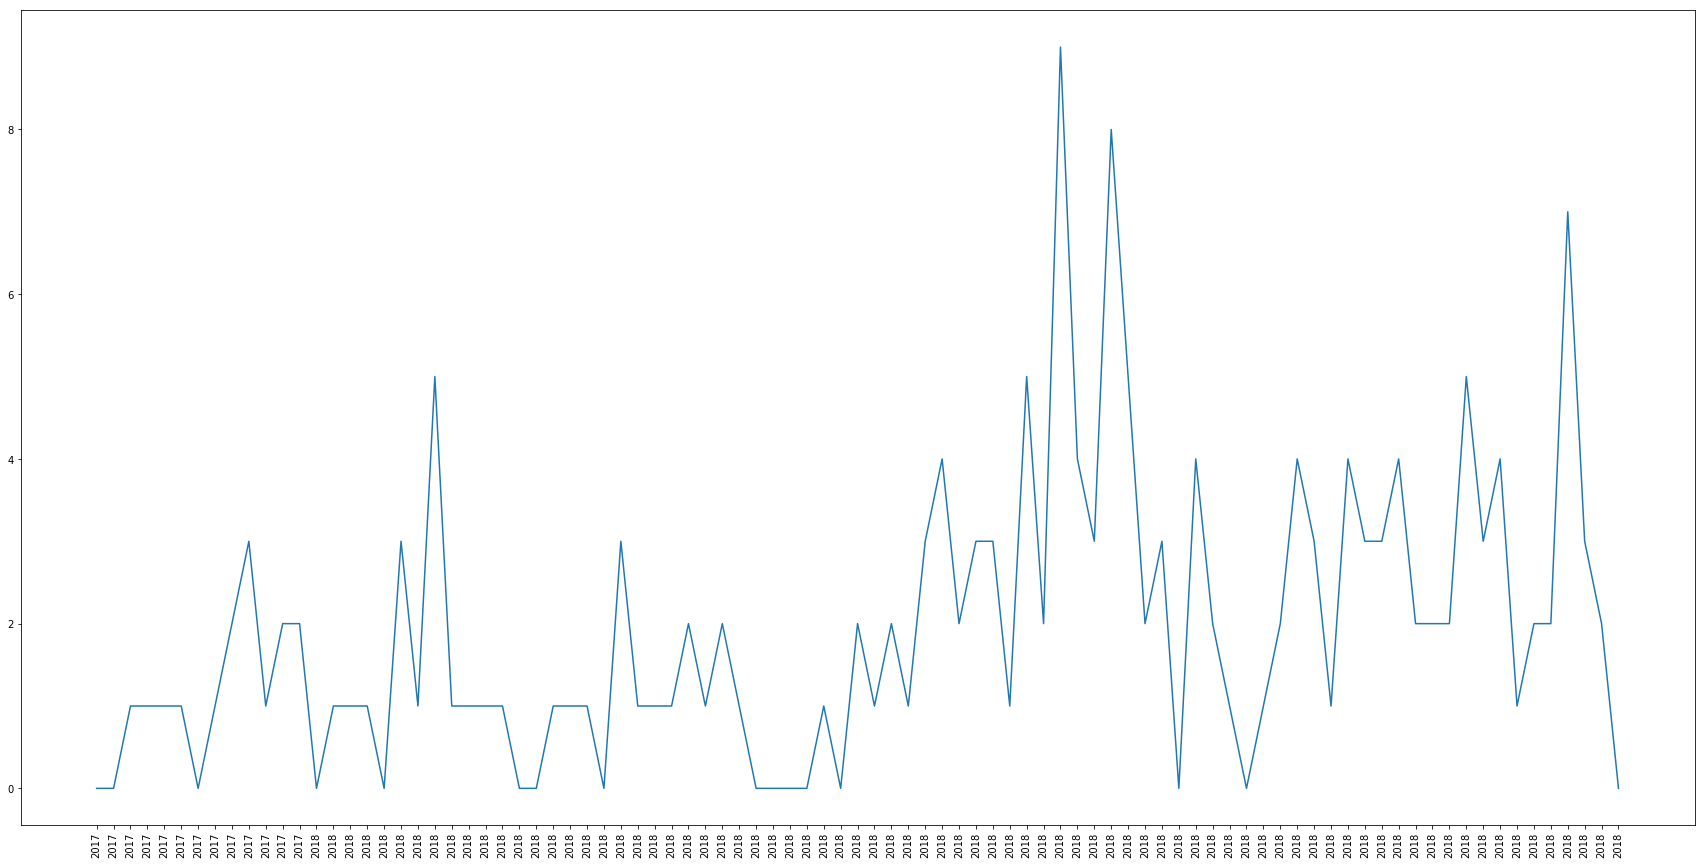

In [24]:
plt.figure(num=None, figsize=(30, 15))
dar = matplotlib.dates.date2num(alldays)
plt.plot(toVis['date'], toVis['title'])
plt.xticks(dar, rotation=90)
plt.show()